# Taxi Fare Prediction Model


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

# Importing csv file

In [33]:
df = pd.read_csv('Taxi_Set.csv')

In [34]:
df.head(10)

,trip_duration_sec,trip_duration_min,trip_duration_hr,distance_traveled_Km,KPH,wait_time_cost,distance_cost,fare_w_flag,tip,miscellaneous_fees,total_fare_new,num_of_passengers,surge_applied
0,748,12.47,0.207833,2.75,13.231756,4.97,4.27,11.94,24,6.30,42.24,1,False
1,1187,19.78,0.329667,3.43,10.404449,7.89,5.33,15.92,24,13.20,53.12,1,False
2,730,12.17,0.202833,3.12,15.382087,4.85,4.85,12.40,0,26.63,39.03,1,True
3,671,11.18,0.186333,5.63,30.214669,4.46,8.75,15.91,0,9.75,25.66,3,False
4,329,5.48,0.091300,2.09,22.883212,2.19,3.25,8.14,12,13.20,33.34,1,False
5,355,5.92,0.098700,1.74,17.635135,2.36,2.70,7.76,0,26.63,34.39,1,True
6,453,7.55,0.125833,2.22,17.642384,3.01,3.45,9.16,0,6.00,15.16,1,False
7,1288,21.47,0.357833,5.21,14.559851,8.56,8.09,19.35,36,26.33,81.68,1,True
8,134,2.23,0.037200,1.48,39.820628,0.89,2.30,5.89,0,6.00,11.89,1,False
9,980,16.33,0.272167,3.48,12.786283,6.52,5.41,14.63,0,6.00,20.63,1,False


In [35]:
df.isnull().sum()

trip_duration_sec       0
trip_duration_min       0
trip_duration_hr        0
distance_traveled_Km    0
KPH                     0
wait_time_cost          0
distance_cost           0
fare_w_flag             0
tip                     0
miscellaneous_fees      0
total_fare_new          0
num_of_passengers       0
surge_applied           0
dtype: int64

In [63]:
df.describe()

,trip_duration_sec,trip_duration_min,trip_duration_hr,distance_traveled_Km,KPH,wait_time_cost,distance_cost,fare_w_flag,tip,miscellaneous_fees,total_fare_new,num_of_passengers
count,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000,207596.000000
mean,873.607083,14.560121,0.242669,4.747041,19.217239,5.808587,7.374142,15.882729,13.034673,15.180929,44.098331,1.297053
std,674.601208,11.243358,0.187389,4.845542,9.220963,4.485386,7.527242,11.328357,20.159914,12.513875,33.400411,0.929766
min,1.000000,0.020000,0.000333,0.020000,0.015300,0.010000,0.030000,2.740000,0.000000,0.000000,3.160000,1.000000
25%,447.000000,7.450000,0.124167,1.950000,13.605275,2.970000,3.030000,8.830000,0.000000,6.000000,21.940000,1.000000
50%,705.000000,11.750000,0.195833,3.200000,17.023995,4.690000,4.970000,12.580000,9.000000,9.750000,35.300000,1.000000
75%,1090.000000,18.170000,0.302833,5.710000,22.105263,7.250000,8.870000,19.000000,20.000000,26.450000,57.460000,1.000000
max,14317.000000,238.620000,3.977000,169.900000,130.000000,95.190000,263.930000,321.360000,2500.000000,435.000000,2539.320000,9.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207596 entries, 0 to 207595
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trip_duration_sec     207596 non-null  int64  
 1   trip_duration_min     207596 non-null  float64
 2   trip_duration_hr      207596 non-null  float64
 3   distance_traveled_Km  207596 non-null  float64
 4   KPH                   207596 non-null  float64
 5   wait_time_cost        207596 non-null  float64
 6   distance_cost         207596 non-null  float64
 7   fare_w_flag           207596 non-null  float64
 8   tip                   207596 non-null  int64  
 9   miscellaneous_fees    207596 non-null  float64
 10  total_fare_new        207596 non-null  float64
 11  num_of_passengers     207596 non-null  int64  
 12  surge_applied         207596 non-null  bool   
dtypes: bool(1), float64(9), int64(3)
memory usage: 19.2 MB


In [37]:
df.columns

Index(['trip_duration_sec', 'trip_duration_min', 'trip_duration_hr',
       'distance_traveled_Km', 'KPH', 'wait_time_cost', 'distance_cost',
       'fare_w_flag', 'tip', 'miscellaneous_fees', 'total_fare_new',
       'num_of_passengers', 'surge_applied'],
      dtype='object')

# Importing Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
df = df.drop(['trip_duration_sec', 'trip_duration_hr', 'wait_time_cost'], axis=1)

In [40]:
df.head()

,trip_duration_min,distance_traveled_Km,KPH,distance_cost,fare_w_flag,tip,miscellaneous_fees,total_fare_new,num_of_passengers,surge_applied
0,12.47,2.75,13.231756,4.27,11.94,24,6.30,42.24,1,False
1,19.78,3.43,10.404449,5.33,15.92,24,13.20,53.12,1,False
2,12.17,3.12,15.382087,4.85,12.40,0,26.63,39.03,1,True
3,11.18,5.63,30.214669,8.75,15.91,0,9.75,25.66,3,False
4,5.48,2.09,22.883212,3.25,8.14,12,13.20,33.34,1,False


In [41]:
df['surge_applied'] = df['surge_applied'].astype(int)

In [42]:
df.head()

,trip_duration_min,distance_traveled_Km,KPH,distance_cost,fare_w_flag,tip,miscellaneous_fees,total_fare_new,num_of_passengers,surge_applied
0,12.47,2.75,13.231756,4.27,11.94,24,6.30,42.24,1,0
1,19.78,3.43,10.404449,5.33,15.92,24,13.20,53.12,1,0
2,12.17,3.12,15.382087,4.85,12.40,0,26.63,39.03,1,1
3,11.18,5.63,30.214669,8.75,15.91,0,9.75,25.66,3,0
4,5.48,2.09,22.883212,3.25,8.14,12,13.20,33.34,1,0


In [43]:
df.columns

Index(['trip_duration_min', 'distance_traveled_Km', 'KPH', 'distance_cost',
       'fare_w_flag', 'tip', 'miscellaneous_fees', 'total_fare_new',
       'num_of_passengers', 'surge_applied'],
      dtype='object')

In [44]:
X = df.drop('total_fare_new', axis=1)
Y = df['total_fare_new']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [46]:
y_pred = model.predict([[12.47,2.75,13.231756,4.27,11.94,24,6.30,1,0]])
print(y_pred)

[42.24]


C:\Users\brock\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['trip_duration_min', 'distance_traveled_Km', 'KPH', 'fare_w_flag', 'tip', 'miscellaneous_fees', 'num_of_passengers', 'surge_applied']]
Y = df['total_fare_new']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
y_pred_example_rf = model_rf.predict([[12.47, 2.75, 13.231756, 11.94, 24, 6.30, 1, 0]])
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)
print(f"Predicted Fare for Example: {y_pred_example_rf[0]}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²) Score: {r2_rf}")


Predicted Fare for Example: 42.268399999999936
Mean Squared Error (MSE): 3.2535437125298845
R-squared (R²) Score: 0.9971002154037449


C:\Users\brock\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['trip_duration_min', 'distance_traveled_Km', 'KPH', 'fare_w_flag', 'tip', 'miscellaneous_fees', 'num_of_passengers', 'surge_applied']]
Y = df['total_fare_new']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, Y_train)
Y_pred_dt = model_dt.predict(X_test)
y_pred_example_dt = model_dt.predict([[12.47, 2.75, 13.231756, 11.94, 24, 6.30, 1, 0]])
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
r2_dt = r2_score(Y_test, Y_pred_dt)
print(f"Predicted Fare for Example: {y_pred_example_dt[0]}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R-squared (R²) Score: {r2_dt}")

Predicted Fare for Example: 42.24
Mean Squared Error (MSE): 6.2134025
R-squared (R²) Score: 0.9944621832525427


C:\Users\brock\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [62]:
# Random Forest is more accurate because it has a lower MSE and a higher R² score

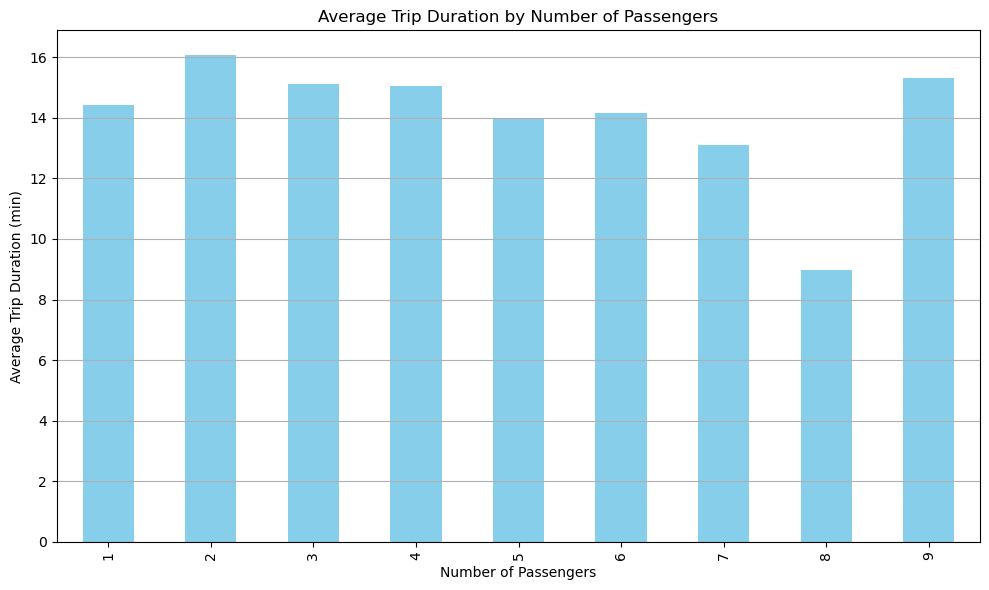

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df.groupby('num_of_passengers')['trip_duration_min'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Trip Duration (min)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

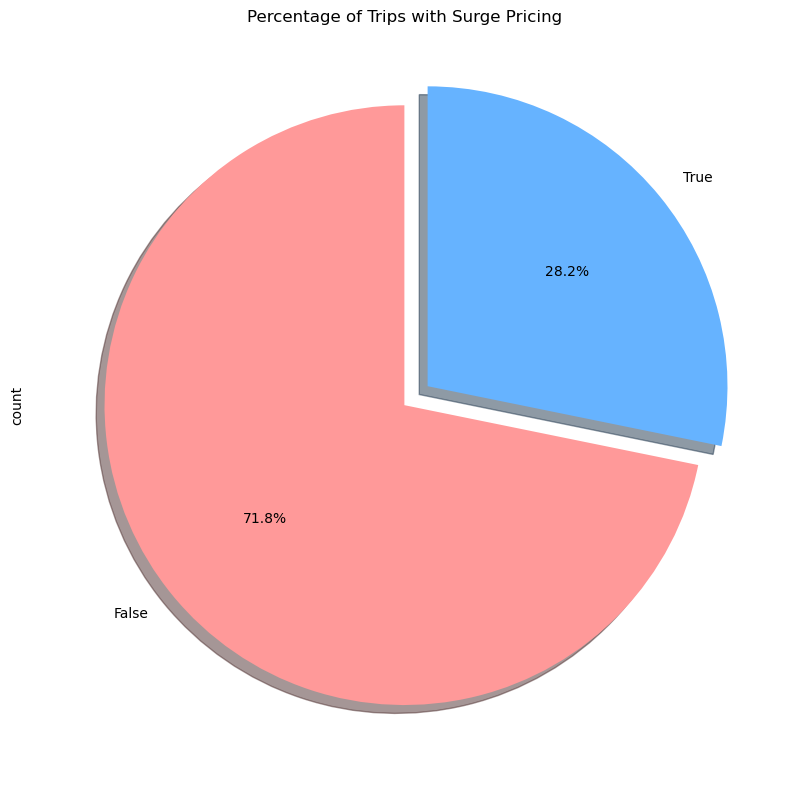

In [20]:
# Plot 2: Pie chart of the number of trips with and without surge pricing
plt.figure(figsize=(8,8))
df['surge_applied'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, shadow=True, explode=(0, 0.1))
plt.title('Percentage of Trips with Surge Pricing')

# Show the plots
plt.tight_layout()
plt.show()

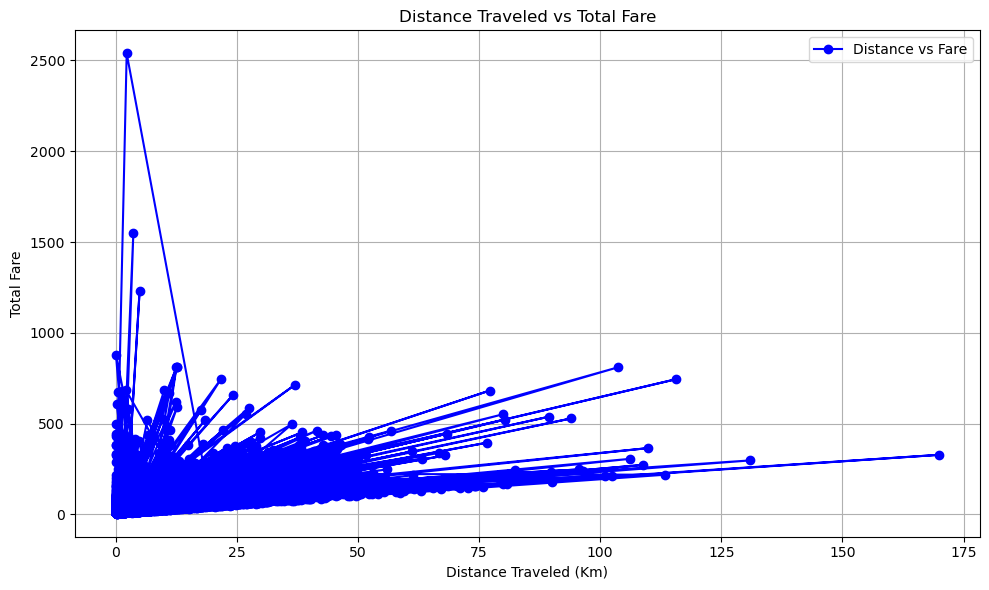

In [21]:
# Plot 3: Line chart showing the relationship between distance traveled and total fare
plt.figure(figsize=(10,6))
plt.plot(df['distance_traveled_Km'], df['total_fare_new'], 'bo-', label='Distance vs Fare')
plt.title('Distance Traveled vs Total Fare')
plt.xlabel('Distance Traveled (Km)')
plt.ylabel('Total Fare')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

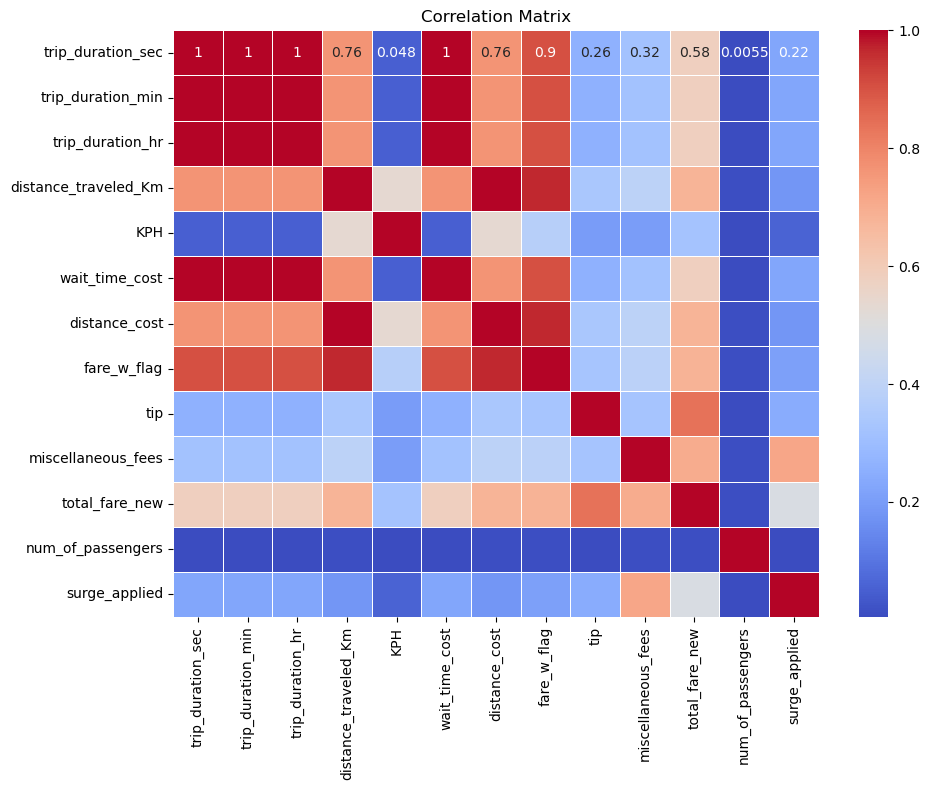

In [24]:
# Correlation Matrix
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()